In [1]:
from sklearn.datasets import fetch_20newsgroups
master_train=fetch_20newsgroups(subset='train',shuffle=True)

In [3]:
from sklearn.datasets import fetch_20newsgroups
master_train=fetch_20newsgroups(subset='train',shuffle=True)
master_test=fetch_20newsgroups(subset='test',shuffle=True)

In [52]:
type(master_train)

sklearn.utils.Bunch

In [2]:
master_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [26]:
print("\n".join(master_train.DESCR.split("\n")[:]))

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality 

In [39]:
print("\n".join(master_train.data[20].split("\n")[:]))

From: keith@cco.caltech.edu (Keith Allan Schneider)
Subject: Re: <<Pompous ass
Organization: California Institute of Technology, Pasadena
Lines: 16
NNTP-Posting-Host: punisher.caltech.edu

livesey@solntze.wpd.sgi.com (Jon Livesey) writes:

[...]
>>The "`little' things" above were in reference to Germany, clearly.  People
>>said that there were similar things in Germany, but no one could name any.
>That's not true.  I gave you two examples.  One was the rather
>pevasive anti-semitism in German Christianity well before Hitler
>arrived.  The other was the system of social ranks that were used
>in Imperail Germany and Austria to distinguish Jews from the rest 
>of the population.

These don't seem like "little things" to me.  At least, they are orders
worse than the motto.  Do you think that the motto is a "little thing"
that will lead to worse things?

keith



In [58]:
master_train.target[:70]

array([ 7,  4,  4,  1, 14, 16, 13,  3,  2,  4,  8, 19,  4, 14,  6,  0,  1,
        7, 12,  5,  0, 10,  6,  2,  4,  1, 12,  9, 15,  7,  6, 13, 12, 17,
       18, 10,  8, 11,  8, 16,  9,  4,  3,  9,  9,  4,  4,  8, 12, 14,  5,
       15,  2, 13, 17, 11,  7, 10,  2, 14, 12,  5,  4,  6,  7,  0, 11, 16,
        0,  6])

**Count Vectoriser with a TF-IDF transform Vs TF-IDF Vectoriser** <br>
Both used with naive bayes

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [45]:
model_one=Pipeline([('cvect',CountVectorizer()),('tfidf',TfidfTransformer()),('nbay',MultinomialNB())])
model_one=model_one.fit(master_train.data,master_train.target)

In [46]:
import numpy as np
master_test=fetch_20newsgroups(subset='test',shuffle=True)

model_one_predict=model_one.predict(master_test.data)
np.mean(model_one_predict==master_test.target)

0.7738980350504514

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [50]:
model_two=Pipeline([('tfidf_v',TfidfVectorizer()),('nbay',MultinomialNB())])
model_two=model_two.fit(master_train.data,master_train.target)

In [51]:
model_two_predict=model_two.predict(master_test.data)
np.mean(model_two_predict==master_test.target)

0.7738980350504514

**Its the same!!** <br>
FML ! <br>

Going for SVM instead of Naive bayes

In [6]:
from sklearn.linear_model import SGDClassifier

In [64]:
model_three=Pipeline([('tfidf_v',TfidfVectorizer()),('svm',SGDClassifier(loss='hinge',alpha=1e-3))])

In [65]:
model_three=model_three.fit(master_train.data,master_train.target)

In [66]:
model_three_predict=model_three.predict(master_test.data)
np.mean(model_three_predict==master_test.target)

0.8238183749336165

**We do some parameter tuning using GridSearch**

In [7]:
from sklearn.model_selection import GridSearchCV

In [68]:
param_model_three={'tfidf_v__ngram_range':[(1, 1),(1,2)],
                  'tfidf_v__use_idf':(True,False),
                  'svm__alpha':(1e-2,1e-3)}
gs_model_three=GridSearchCV(model_three,param_model_three,n_jobs=-1)

In [69]:
gs_model_three=gs_model_three.fit(master_train.data,master_train.target)

/Users/apple/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [72]:
gs_model_three.best_score_

0.8985327912321018

In [73]:
gs_model_three.best_params_

{'svm__alpha': 0.001, 'tfidf_v__ngram_range': (1, 2), 'tfidf_v__use_idf': True}

**Let's sprinkle some NLTK**

First we look into Stop words

In [77]:
#running the best param found earlirer along with stop words.

model_four=Pipeline([('tfidf_v',TfidfVectorizer(stop_words='english',ngram_range=(1, 2))),('svm',SGDClassifier(loss='hinge',alpha=1e-3))])
model_four=model_four.fit(master_train.data,master_train.target)
model_four_predict=model_four.predict(master_test.data)
np.mean(model_four_predict==master_test.target)

0.8313860860329262

**Keeping Track of our Models:**<br>
**model_one:** CountVectorizer, tf-idf transformer, Naive Bayes<br>
**model_two:** Tf-idf Vectorizer, Naive Bayes<br>
**model_three:** Tf-idf Vectorizer, SVM<br>
**model_four:** Tf-idf Vectorizer with stop words, SVM<br>
**model_five:** Tf-idf Vectorizer with stop words, Naive Bayes<br>
**model_six:** StemmedCountVectoriser, ignore stop words=True,if-idf transformer, Naive Bayes<br>
**model_seven:** StemmedCountVectoriser, ignore stop words=True,if-idf transformer, SVM
**model_eight:** StemmedCountVectoriser with stop words=False,if-idf transformer, SVM
**model_six:**
**model_six:**

In [81]:
model_five=Pipeline([('tfidf_v',TfidfVectorizer(stop_words='english')),('nbay',MultinomialNB())])
model_five=model_five.fit(master_train.data,master_train.target)
model_five_predict=model_four.predict(master_test.data)
np.mean(model_five_predict==master_test.target)

0.8313860860329262

* It seems, adding stop words is a bad idea.<br> 
* We can run a grid search with the stopwords, but it seems unlikely that its gonna beat the 89.85 accuracy, as we saw the accuracy going down in the SVM model.<br>
* What is most interesting is that the NB model and the SVM model are yeilding the exact same accuracy.

In [8]:
import nltk
from nltk.stem.snowball import SnowballStemmer

In [86]:
#Stemming
#Going for the model_one approach, first vectorizr then if-idf then modelling. 

stemmer=SnowballStemmer('english', ignore_stopwords=True)

class scvect(CountVectorizer):
    def build_analyzer(self):
        analyzer=super(scvect, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])

sc_vect=scvect(stop_words='english')

model_six=Pipeline([('scvect',sc_vect),('tfidf',TfidfTransformer()),('nbay',MultinomialNB())])

model_six=model_six.fit(master_train.data,master_train.target)
model_six_predict=model_six.predict(master_test.data)

np.mean(model_six_predict==master_test.target)

0.8114710568242167

In [88]:

model_seven=Pipeline([('scvect',sc_vect),('tfidf',TfidfTransformer()),('svm',SGDClassifier(loss='hinge',alpha=1e-3))])

model_seven=model_seven.fit(master_train.data,master_train.target)
model_seven_predict=model_seven.predict(master_test.data)

np.mean(model_seven_predict==master_test.target)

0.8203664365374402

In [89]:
stemmer=SnowballStemmer('english', ignore_stopwords=False)

class scvect(CountVectorizer):
    def build_analyzer(self):
        analyzer=super(scvect, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])
    
sc_vect=scvect(stop_words='english')

model_eight=Pipeline([('scvect',sc_vect),('tfidf',TfidfTransformer()),('svm',SGDClassifier(loss='hinge'))])

model_eight=model_eight.fit(master_train.data,master_train.target)
model_eight_predict=model_eight.predict(master_test.data)

np.mean(model_eight_predict==master_test.target)

0.8210302708443973

### Issue, Below section Under Construction

In [120]:
stemmer=SnowballStemmer('english', ignore_stopwords=False)

class scvect(CountVectorizer):
    def build_analyzer(self):
        analyzer=super(scvect, self).build_analyzer()
        r=[] 
        for doc in self:
            r.append([stemmer.stem(w) for w in analyzer(doc)])
        return r
    
sc_vect=scvect(stop_words='english')

model_eight=Pipeline([('scvect',sc_vect),('tfidf',TfidfTransformer()),('svm',SGDClassifier(loss='hinge'))])

model_eight=model_eight.fit(master_train.data,master_train.target)
model_eight_predict=model_eight.predict(master_test.data)

np.mean(model_eight_predict==master_test.target)

TypeError: 'scvect' object is not iterable

In [ ]:
from functools import partial
from sklearn.externals.joblib import dump

stemmer=SnowballStemmer('english', ignore_stopwords=False)

analyzer=CountVectorizer.build_analyzer()
def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

sc_vect=scvect(stop_words='english', analyzer=build_analyzer)

#model_eight=Pipeline([('scvect',sc_vect),('tfidf',TfidfTransformer()),('svm',SGDClassifier(loss='hinge'))])

model_eight=model_eight.fit(master_train.data,master_train.target)
model_eight_predict=model_eight.predict(master_test.data)

In [117]:
from functools import partial
from sklearn.externals.joblib import dump

stemmer=SnowballStemmer('english', ignore_stopwords=False)

analyzer=CountVectorizer.build_analyzer()
def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

sc_vect=scvect(stop_words='english', analyzer=build_analyzer)

model_eight=Pipeline([('scvect',sc_vect),('tfidf',TfidfTransformer()),('svm',SGDClassifier(loss='hinge'))])

model_eight=model_eight.fit(master_train.data,master_train.target)
model_eight_predict=model_eight.predict(master_test.data)

np.mean(model_eight_predict==master_test.target)

TypeError: build_analyzer() missing 1 required positional argument: 'self'

In [ ]:
stemmer = FrenchStemmer()
analyzer = CountVectorizer().build_analyzer()

def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

stem_vectorizer = CountVectorizer(analyzer=stemmed_words)

In [110]:
print(stemmer.stem(master_train.data[0]))

from: lerxst@wam.umd.edu (where's my thing)
subject: what car is this!?
nntp-posting-host: rac3.wam.umd.edu
organization: university of maryland, college park
lines: 15

 i was wondering if anyone out there could enlighten me on this car i saw
the other day. it was a 2-door sports car, looked to be from the late 60s/
early 70s. it was called a bricklin. the doors were really small. in addition,
the front bumper was separate from the rest of the body. this is 
all i know. if anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

thanks,
- il
   ---- brought to you by your neighborhood lerxst ----







In [111]:
master_train.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [100]:
param_model_eight={'tfidf__ngram_range':[(1, 1),(1,2)],
                  'tfidf__use_idf':(True,False),
                  'svm__alpha':(1e-2,1e-3)}
gs_model_eight=GridSearchCV(model_eight,param_model_eight,n_jobs=-1)

In [ ]:
gs_model_eight=gs_model_eight.fit(master_train.data,master_train.target)

In [95]:
gs_model_eight.best_score_

0.8989747215838784

In [97]:
gs_model_eight.best_params_

{'svm__alpha': 0.001, 'tfidf_v__ngram_range': (1, 2), 'tfidf_v__use_idf': True}

### ------------------------------------------------------------------------------------------------------

### Implementing TF using Keras

In [13]:
tfidf=TfidfVectorizer()

In [36]:
tfidf.fit(master_train.data)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [75]:
len(tfidf.vocabulary_.keys())

130107

In [39]:
x_train=tfidf.transform(master_train.data)

In [61]:
x_test

<7532x130107 sparse matrix of type '<class 'numpy.int64'>'
	with 1107956 stored elements in Compressed Sparse Row format>

In [41]:
x_test=vectorizer.transform(master_test.data)

In [91]:
from keras.models import Sequential
from keras import layers
import tensorflow as tf
tf.config.experimental_run_functions_eagerly(True)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [92]:
tf.config.run_functions_eagerly

<function tensorflow.python.eager.def_function.run_functions_eagerly(run_eagerly)>

In [45]:
input_dim=x_train.shape[1]
input_dim

130107

In [48]:
kmodel=Sequential()
kmodel.add(layers.Dense(50,input_dim=input_dim,activation='relu'))
kmodel.add(layers.Dense(20,activation='softmax'))

In [95]:
kmodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
kmodel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 50)                6505400   
_________________________________________________________________
dense_3 (Dense)              (None, 20)                1020      
Total params: 6,506,420
Trainable params: 6,506,420
Non-trainable params: 0
_________________________________________________________________


In [58]:
type(x_train)

scipy.sparse.csr.csr_matrix

In [59]:
import scipy as scipy

In [85]:
x_train.sort_indices()
x_test.sort_indices()

Going for one_hot Encoding os the Y- targets

In [87]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

In [88]:
encoder = LabelEncoder()
encoder.fit(master_train.target)
encoded_train_y = encoder.transform(master_train.target)
encoded_test_y = encoder.transform(master_test.target)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_train_y = np_utils.to_categorical(encoded_train_y)
dummy_test_y = np_utils.to_categorical(encoded_test_y)

In [97]:
history = kmodel.fit(x_train, dummy_train_y,
...                     epochs=50,
...                     verbose=False,
...                     validation_data=(x_test, dummy_test_y),
...                     batch_size=10)

In [99]:
#10:45 AM - 11:42 AM

loss, accuracy = kmodel.evaluate(x_train, dummy_train_y, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = kmodel.evaluate(x_test, dummy_test_y, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9997
Testing Accuracy:  0.7471


#that is pretty impressive

In [106]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
#%matplotlib inline

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    

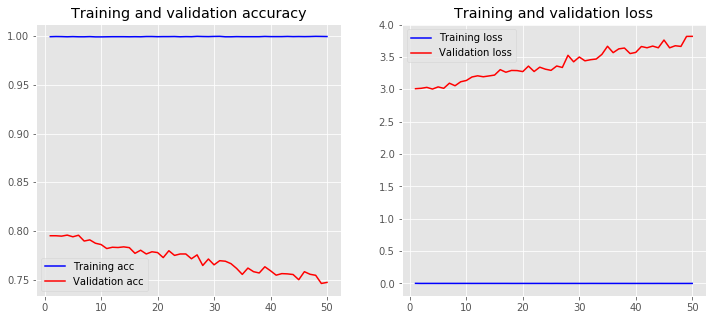

In [107]:
plot_history(history)

In [125]:
#trying to se SDG and a higher learning rate

from keras.optimizers import SGD
kmodel2=Sequential()
kmodel2.add(layers.Dense(50,input_dim=input_dim,activation='relu'))
kmodel2.add(layers.Dense(20,activation='softmax'))
opt = SGD(lr=0.1, momentum=0.9)
kmodel2.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
kmodel2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 50)                6505400   
_________________________________________________________________
dense_5 (Dense)              (None, 20)                1020      
Total params: 6,506,420
Trainable params: 6,506,420
Non-trainable params: 0
_________________________________________________________________


In [131]:
history = kmodel2.fit(x_train, dummy_train_y,
...                     epochs=15,
...                     verbose=0,
...                     validation_data=(x_test, dummy_test_y),
...                     batch_size=10)

In [132]:
loss, accuracy = kmodel2.evaluate(x_train, dummy_train_y, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = kmodel2.evaluate(x_test, dummy_test_y, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9964
Testing Accuracy:  0.2819


In [133]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
#%matplotlib inline

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

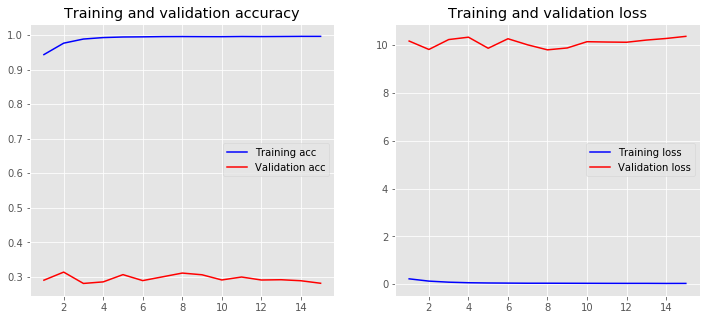

In [134]:
plot_history(history)

In [136]:
#trying to se SDG and a lower learning rate, with lower nodes as well(Reducing complexity)

from keras.optimizers import SGD
kmodel3=Sequential()
kmodel3.add(layers.Dense(25,input_dim=input_dim,activation='relu'))
kmodel3.add(layers.Dense(20,activation='softmax'))
opt = SGD(lr=0.0001, momentum=0.9)
kmodel3.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
kmodel3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 25)                3252700   
_________________________________________________________________
dense_9 (Dense)              (None, 20)                520       
Total params: 3,253,220
Trainable params: 3,253,220
Non-trainable params: 0
_________________________________________________________________


In [137]:
history = kmodel3.fit(x_train, dummy_train_y,
...                     epochs=5,
...                     verbose=0,
...                     validation_data=(x_test, dummy_test_y),
...                     batch_size=10)

In [138]:
loss, accuracy = kmodel2.evaluate(x_train, dummy_train_y, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = kmodel2.evaluate(x_test, dummy_test_y, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.0506
Testing Accuracy:  0.0551


In [139]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
#%matplotlib inline

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

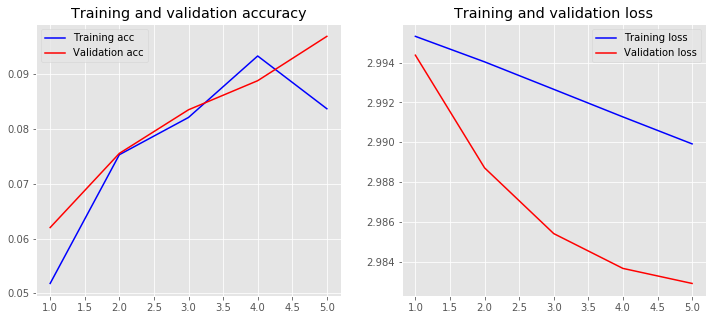

In [140]:
plot_history(history)

In [142]:
from keras.optimizers import SGD
kmodel4=Sequential()
kmodel4.add(layers.Dense(50,input_dim=input_dim,activation='relu'))
kmodel4.add(layers.Dense(20,activation='softmax'))
opt = SGD(lr=0.0001, momentum=0.9)
kmodel4.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
kmodel4.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 50)                6505400   
_________________________________________________________________
dense_13 (Dense)             (None, 20)                1020      
Total params: 6,506,420
Trainable params: 6,506,420
Non-trainable params: 0
_________________________________________________________________


In [143]:
history = kmodel4.fit(x_train, dummy_train_y,
...                     epochs=20,
...                     verbose=0,
...                     validation_data=(x_test, dummy_test_y),
...                     batch_size=10)

In [144]:
loss, accuracy = kmodel4.evaluate(x_train, dummy_train_y, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = kmodel4.evaluate(x_test, dummy_test_y, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.3004
Testing Accuracy:  0.1488


In [ ]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

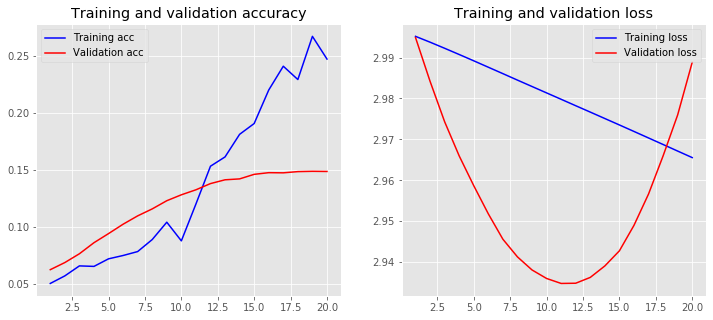

In [145]:
plot_history(history)